# Контрольная работа

In [1]:
import scipy.stats as sts
import numpy as np

### Правила игры

* контрольная состоит из 3-х задач, баллы за задание указаны в скобках
* у вас есть одна пара (1 ч. 20 мин.) на решение
* можно пользоваться материалами с лекций и семинаров
* решение отправлять на почту ahmedzarmanbetov@mail.ru (нужно прикрепить .ipynb файл)

### Вероятности (2 балла)

У вас есть следующие случайные величины:

* $X_1 \sim Pois(10)$ - Пуассона
* $X_2 \sim N(7, 1)$ – нормальное
* $X_3 \sim U[-2;4]$ – равномерное

Оцените следующие вероятности: 

1. $P(X_1 - X2 > X_3)$
2. $P(X_1 - X2 < X_3^2)$

In [22]:
N = 100_000

x1 = np.random.poisson(lam=10, size=N)
x2 = np.random.normal(7, 1, size=N)
x3 = np.random.uniform(-2, 4, size=N)

np.mean(x1 - x2 > x3), np.mean(x1 - x2 < x3**2)

(0.69112, 0.52162)

In [23]:
N = 100_000

x1 = sts.poisson(10).rvs(N)
x2 = sts.norm(7, 1).rvs(N)
x3 = sts.uniform(-2, 6).rvs(N)

np.mean(x1 - x2 > x3), np.mean(x1 - x2 < x3**2)

(0.69273, 0.52069)

### Везение (4 балла)

Миша разбирается в баскетболе и угадывает победителя матча с вероятностью 0.7. Ваня же не разбирается в баскетболе, он называет победителя матча наугад (вероятность 0.5).

Миша и Ваня решили посмотреть 7 матчей баскетбола и сделать прогноз. Оказалось, что Миша угадал только результат только 3 матчей, а Ваня угадал результат 5 матчей.

Ответьте на следующие вопросы с помощью генерации выборок:
1. (1 балл) Найдите вероятность, что Миша угадал бы только результаты 3 матчей, если бы смотрел матчи один.
2. (1 балл) Найдите вероятность, что Ваня угадал бы результаты 5 матчей, сли бы смотрел матчи один.
3. (2 балла) Найдите вероятность, что Миша угадал результаты 3 матчей, а Ваня 5.

Как вы думаете, связаны ли как-то вероятности в 1-3 пунтах между собой?

In [64]:
N = 10_000

#### 1.

In [65]:
misha = np.random.binomial(n=7, p=0.7, size=N)
np.mean(misha == 3)

0.1011

In [66]:
misha = np.random.choice([1, 0], p=[0.7, 1 - 0.7], size=(7, N)).sum(axis=0)
np.mean(misha == 3)

0.096

In [67]:
count = 0
for _ in range(N):
    good = np.random.choice([1, 0], p=[0.7, 1 - 0.7], size=7).sum()
    count = count + (good == 3)
count / N

0.0952

#### 2.

In [75]:
vanya = np.random.binomial(n=7, p=0.5, size=N)
np.mean(vanya == 5)

0.1614

In [76]:
...

Ellipsis

#### 3.

In [104]:
misha = np.random.binomial(n=7, p=0.7, size=N)
vanya = np.random.binomial(n=7, p=0.5, size=N)

good = (misha == 3) & (vanya == 5)
np.mean(good)

0.0159

In [105]:
# P(AB) = P(A) * P(B)
0.096 * 0.1614

0.015494399999999998

### Пьяный стрелок (4 балла)

<center>
    <img src="https://torrent-rose.ru/_ld/13/00291481.png" width="450px">
</center>

На диком западе живет очень точный ковбой. Его точность очень высока, вероятность попасть по мишени почти равна 1. Одним прекрасным вечером ковбой решил зайти в заведение "Тир и бар". Хорошенько выпил, а после решил пострелять. Бармен, работающий в этом заведении, хорошо знал ковбоя. Также он знал, что чем больше выпьет ковбой, тем хуже он стреляет. Поэтому предложил ему на выбор два варианта игры:

1. У ковбоя есть один выстрел. Попадает по мишени - выигрывает, не попадает - проигрывает.
2. Ковбою даётся 20 патронов, ему нужно попасть хотя бы по 7 мишеням. Но после каждого попадания, ковбой будет выпивать, следовательно, его точность будет уменьшаться.

Так ковбой уже выпил, вероятность попасть по мишени равна 0.3, после каждого выпитого напитка его точность уменьшается на 10%. Вы -- хороший друг ковбоя, который знает основа тервера, а также Python, чтобы замоделировать ситуацию.

Какой из вариантов ему стоит выбрать? Какой вариант вы бы выбрали, если бы вас просили ответить на вопрос без всяких вычислений (ответ никак не учитывается, просто интересна ваша интуиция)?

In [177]:
print('Вероятность победы в первом варианте: 0.3')

Вероятность победы в первом варианте: 0.3


In [178]:
def game(p: float = 0.3) -> int:
    count = 0
    for _ in range(20):
        shot = np.random.choice([1, 0], p=[p, 1 - p], size=1)[0]
        if shot == 1:
            count += 1
            p = p * 0.9
    if count < 7:
        return 0
    else:
        return 1
game()

0

In [179]:
N = 10_000
count = 0

for _ in range(N):
    count += game()

prob = count / N
# print(f'Вероятность победы во втором варианте: {prob}')

Вероятность победы во втором варианте: 0.1171


In [180]:
def get_prob_win(p: float, n: int = 10_000) -> float:
    count = 0
    for _ in range(n):
        count += game(p=p)

    prob = count / N
    return prob

In [181]:
get_prob_win(0.3)

0.1166

In [182]:
get_prob_win(0.5)

0.6115

In [185]:
x = np.linspace(0, 1, 11)
y = [get_prob_win(prob) for prob in x]

In [186]:
import matplotlib.pyplot as plt

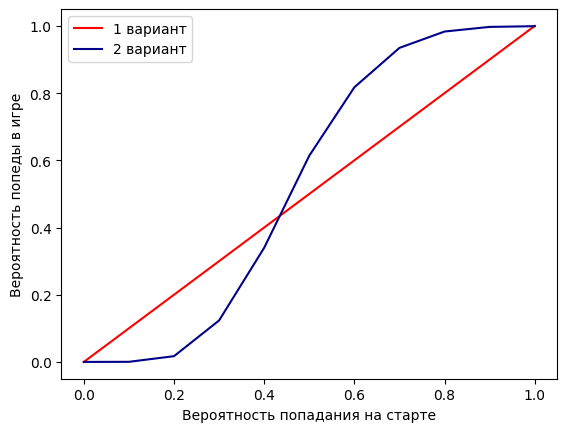

In [200]:
plt.plot([0, 1], [0, 1], color='red', label='1 вариант')
plt.plot(x, y, '-', color='darkblue', label='2 вариант')
plt.xlabel('Вероятность попадания на старте')
plt.ylabel('Вероятность попеды в игре');
plt.legend();

In [201]:
get_prob_win(0.42)

0.4006

In [204]:
get_prob_win(0.435)

0.4355

In [ ]:
i1 = 5.0
i2 = np.random.normal(...)
i3 = np.random.normal(...)
i4 = np.random.normal(...)

profit1
profit2
...
profit1_000_000

In [211]:
sample = np.random.choice([1, 0], p=[p, 1 - p], size=7)

In [212]:
sample

array([1, 1, 0, 1, 1, 1, 1])

---